<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/face_mask_detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Mask Detection Version 2**

## Download Datasets

In [ ]:
! gdown --id 17-FCstm8Fz3bDzFgTmOWHa_c39lTR_1P

Downloading...
From: https://drive.google.com/uc?id=17-FCstm8Fz3bDzFgTmOWHa_c39lTR_1P
To: /content/CMFD.zip
100% 10.3G/10.3G [03:34<00:00, 47.9MB/s]


In [ ]:
! unzip CMFD.zip

In [ ]:
! gdown --id 1gjltyD_MnNWcnd56NnjUOizdi39CUEPF

Downloading...
From: https://drive.google.com/uc?id=1gjltyD_MnNWcnd56NnjUOizdi39CUEPF
To: /content/IMFD.zip
100% 10.3G/10.3G [02:32<00:00, 67.2MB/s]


In [ ]:
! unzip IMFD.zip

## Import all of packages

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

## Test one image dataset

In [3]:
img_array = cv2.imread('Face_Mask/00000_Mask.jpg')

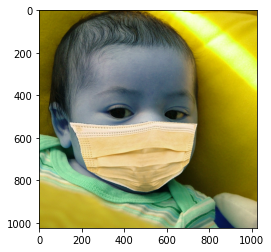

In [4]:
plt.imshow(img_array)

In [5]:
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [6]:
img_array.shape

(1024, 1024, 3)

## Load actual datasets

In [7]:
dataDir = '/content/'
classes = ['Face_Mask', 'No_Mask']
img_size = 224 # Imagenet => 224 x 224

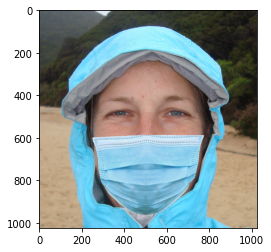

In [8]:
for cat in classes:
  path = os.path.join(dataDir, cat)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

## Convert all of images to array

In [9]:
training_datalist = []

def training_data():
  for cat in classes:
    path = os.path.join(dataDir, cat)
    class_num = classes.index(cat)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_datalist.append([new_array, class_num])
      except Exception:
        return 'Error'

In [10]:
training_data()

In [11]:
random.shuffle(training_datalist)

In [12]:
features = []
labels = []

for feature, label in training_datalist:
  features.append(feature)
  labels.append(label)

features = np.array(features).reshape(-1, img_size, img_size, 3)

In [13]:
features.shape

(1878, 224, 224, 3)

## Normalize data

In [14]:
features = features / 255 ## Normalizing that

In [15]:
labels[1000]

1

In [16]:
labels = np.array(labels)

In [17]:
len(labels)

1878

In [18]:
features.shape

(1878, 224, 224, 3)

## Save data

In [19]:
import pickle

pickle.dump(features, open('features.pkl', 'wb'))
pickle.dump(labels, open('labels.pkl', 'wb'))

## **Deep Learning for training**

In [32]:
features = pickle.load(open('data_normalized/features.pkl', 'rb'))
labels = pickle.load(open('data_normalized/labels.pkl', 'rb'))

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
model = tf.keras.applications.mobilenet.MobileNet() # Pre-trained model

In [35]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer learning

In [36]:
base_input = model.layers[0].input

In [37]:
base_output = model.layers[-4].output

In [38]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [39]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [40]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

## Setup binary classification (Face Mask/No Mask)

In [41]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
new_model.fit(features, labels, epochs=1, validation_split=0.1)

In [ ]:
new_model.save('model_facemask.h5')

## Checking Network Prediction

In [ ]:
model_test = tf.keras.models.load_model('model_facemask.h5')

In [ ]:
frame = cv2.imread('Face_Mask/00002_Mask.jpg')

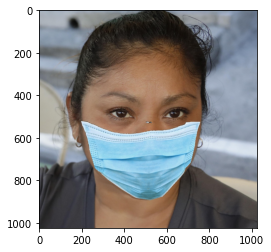

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255

In [ ]:
predictions = model_test.predict(final_image)
predictions

array([[-4.2401204]], dtype=float32)

## Checking Unknown Images

In [ ]:
frame = cv2.imread('vio.jpg')
frame.shape

(1024, 768, 3)

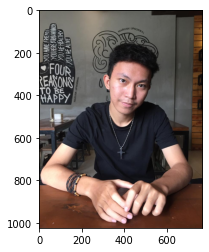

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 768)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
  faces2 = faceCascade.detectMultiScale(roi_gray)
  if len(faces2) == 0:
    print('Face not detected')
  else:
    for (ex, ey, ew, eh) in faces2:
      face_roi = roi_color[ey: ey+eh, ex:ex+ew]

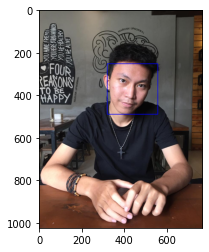

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

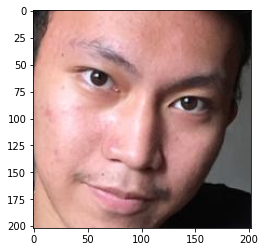

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255

In [ ]:
predictions = model_test.predict(final_image)
predictions

array([[11.51889]], dtype=float32)

## Face Mask Detections

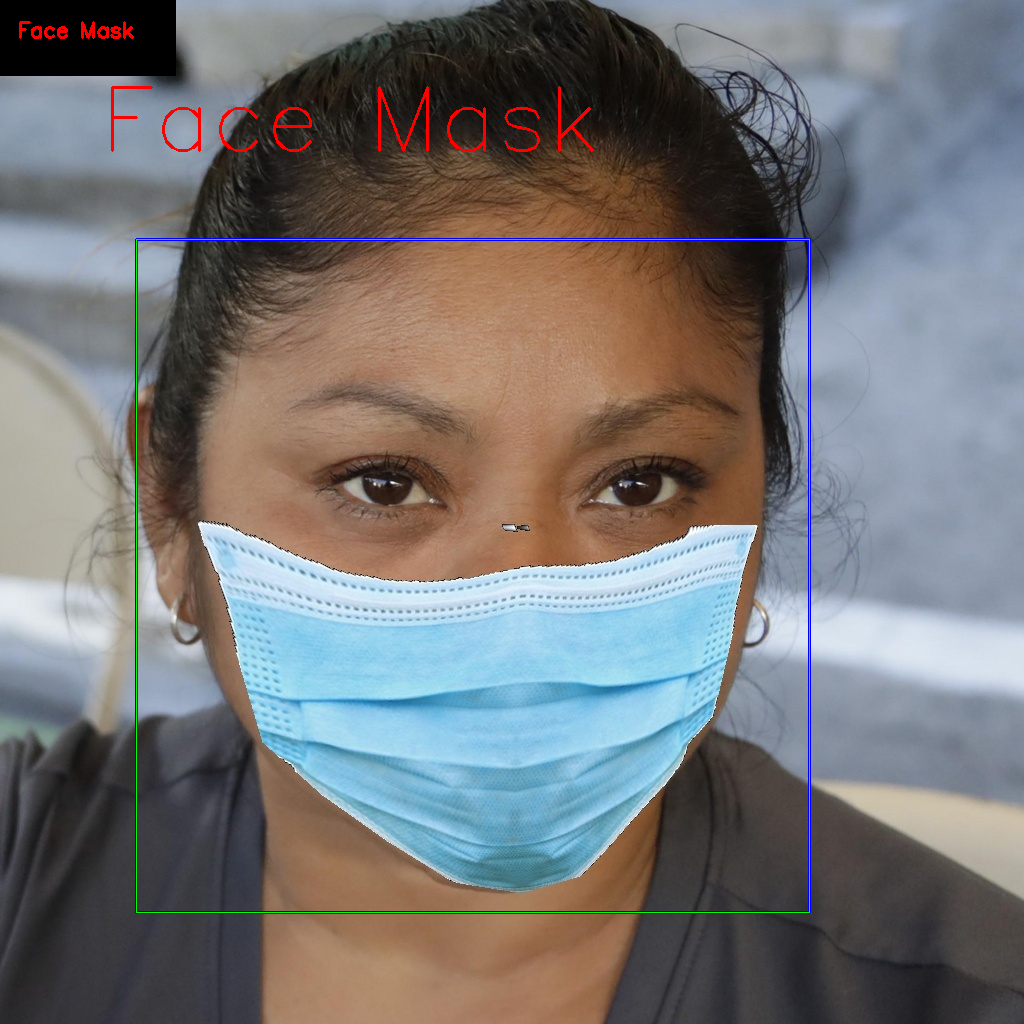

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Declare Variable
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Set rectangle background
rectangle_bgr = (255, 255, 255)
# Make black image
img = np.zeros((500, 500))
# Set text
text = ''
# Get Width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, font_scale, 1)[0]

# Set Start position
text_offset_x = 10
text_offset_y = img.shape[0] -15

# Make the coordinates of the box
box_coord = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coord[0], box_coord[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, font_scale, (0, 0, 0), 1)


while True:
  frame = cv2.imread('Face_Mask/00002_Mask.jpg')
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray, 1.1, 4)
  for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces2 = faceCascade.detectMultiScale(roi_gray)
    if len(faces2) == 0:
      print('Face not detected')
    else:
      for (ex, ey, ew, eh) in faces2:
        face_roi = roi_color[ey: ey+eh, ex:ex+ew]
  final_image = cv2.resize(face_roi, (224, 224))
  final_image = np.expand_dims(final_image, axis=0)
  final_image = final_image/255
  font = cv2.FONT_HERSHEY_SIMPLEX
  
  predictions = model_test.predict(final_image)
  font_scale = 1.5
  
  if (predictions > 0):
    status = 'No Mask'

    x1, y1, w1, h1 = 0, 0, 175, 75
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), font, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
  else:
    status = 'Face Mask'

    x1, y1, w1, h1 = 0, 0, 175, 75
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), font, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
  
  cv2_imshow(frame)
  

  break

  

In [30]:
! zip -r Pretrained-facemask.zip data_normalized/

  adding: data_normalized/ (stored 0%)
  adding: data_normalized/labels.pkl (deflated 95%)
  adding: data_normalized/.ipynb_checkpoints/ (stored 0%)
  adding: data_normalized/features.pkl (deflated 84%)


## Clean Up

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)